# Entropy Estimator - K-NN

In [1]:
import sys, os
from pyprojroot import here

# spyder up to find the root
pysim_root = "/home/emmanuel/code/pysim"
# append to path
sys.path.append(str(pysim_root))

import numpy as np

# MATPLOTLIB Settings
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# SEABORN SETTINGS
import seaborn as sns
import corner

sns.set_context(context="talk", font_scale=0.7)

%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [2]:
from mutual_info.mutual_info import entropy as mi_entropy
from npeet.entropy_estimators import entropy as npeet_entropy

## Demo Data - Gaussian

In [19]:
from pysim.data.information.gaussian import generate_gaussian_data

# parameters
n_samples = 50_000
n_features = 25

# create seed (trial number)
res_tuple = generate_gaussian_data(n_samples=n_samples, n_features=n_features,)

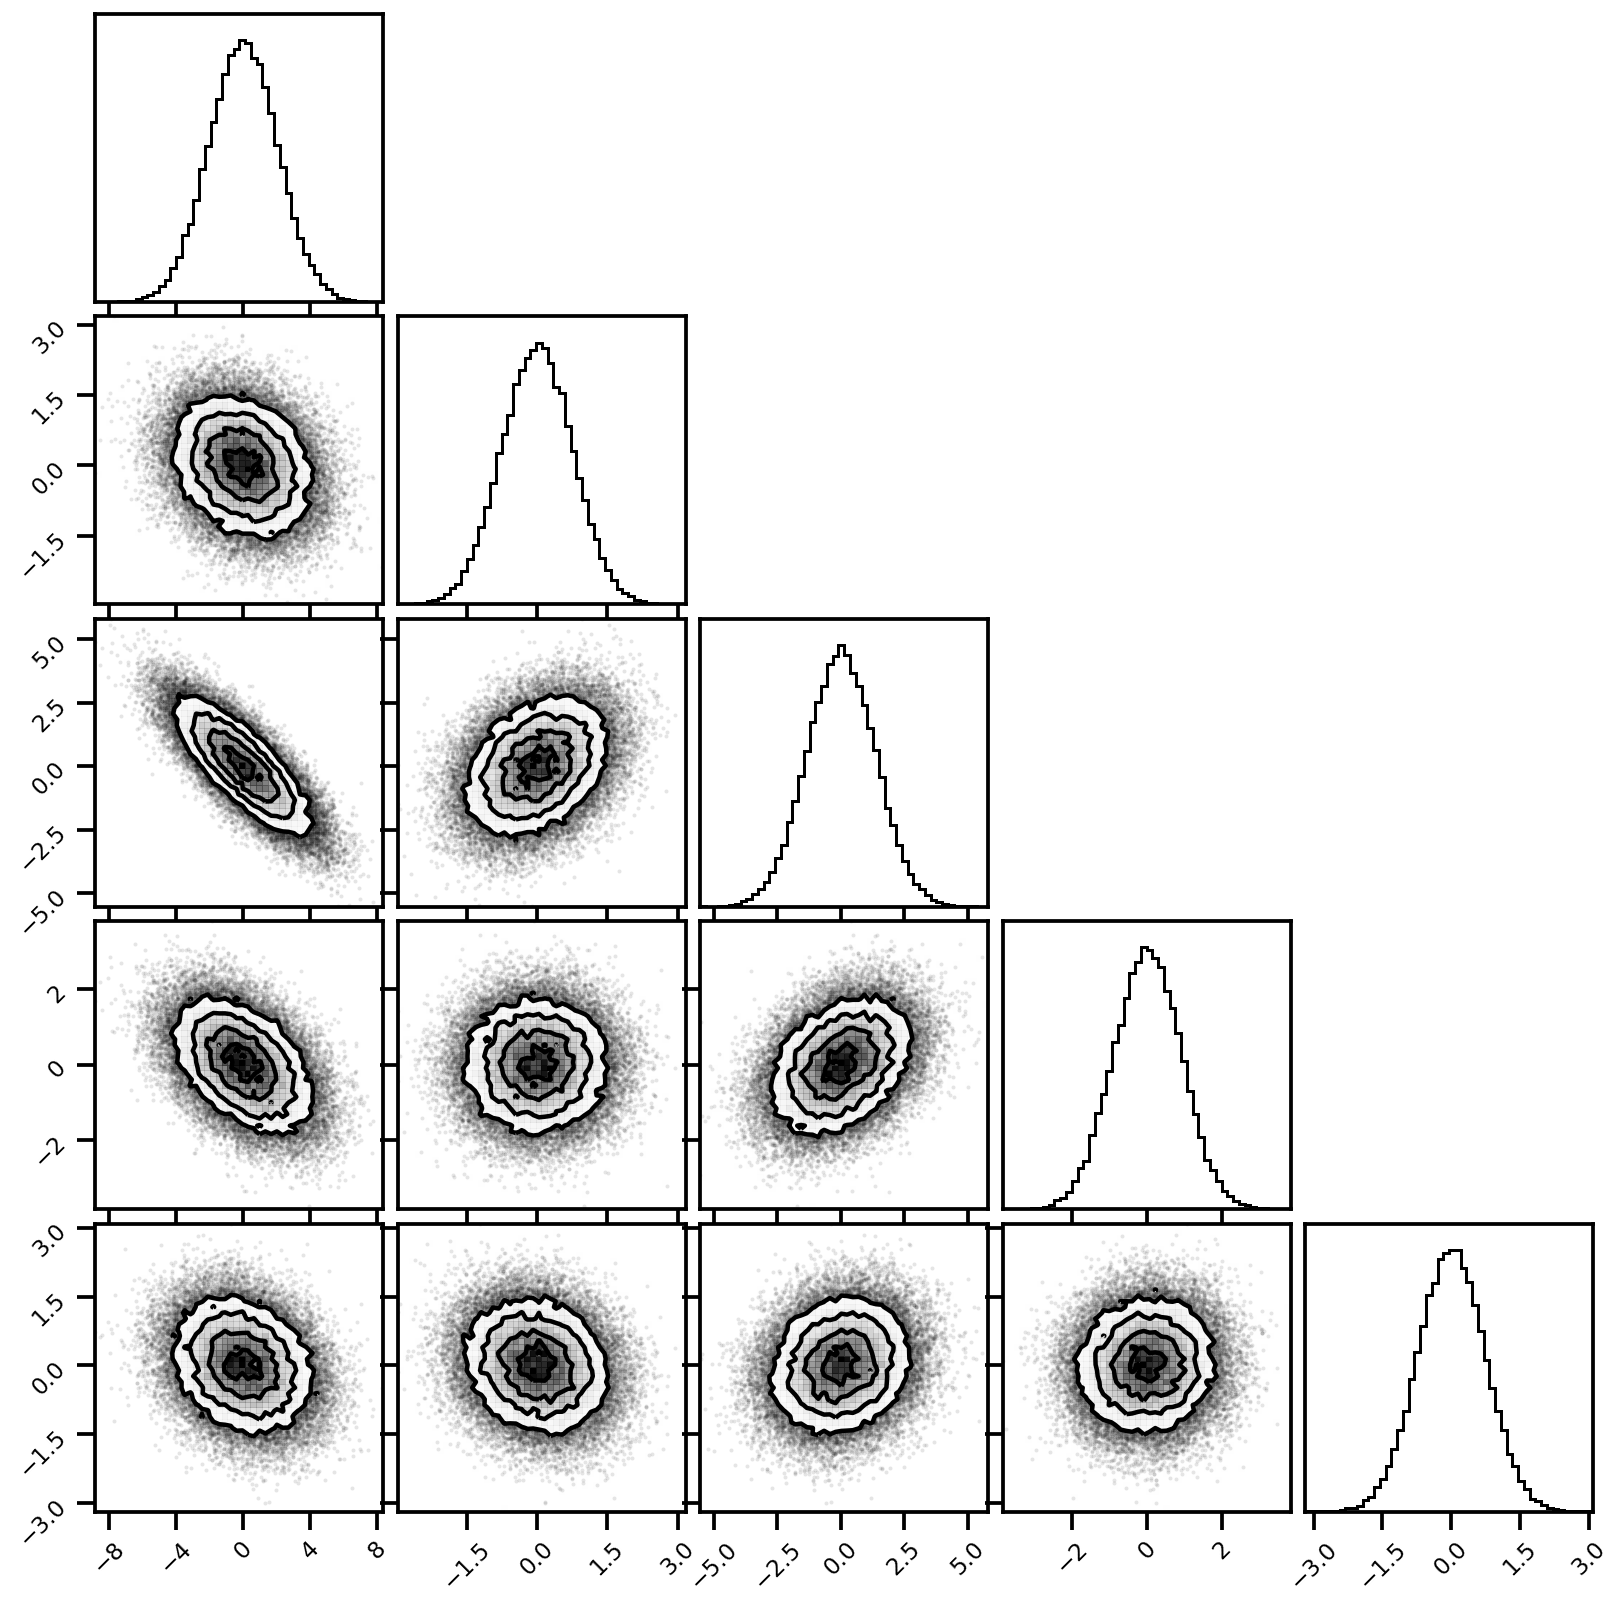

In [20]:
fig = corner.corner(res_tuple.X[:, :5], bins=50)

## K-Nearest Neighbors

In [21]:
from mutual_info.mutual_info import entropy as mi_entropy
from npeet.entropy_estimators import entropy as npeet_entropy

print(f"True Estimator: {res_tuple.H:.4f} nats")

H_mi = mi_entropy(res_tuple.X, k=10, transform=None)
print(f"H_mi Estimator: {H_mi:.10f} nats")

H_npeet = npeet_entropy(res_tuple.X, k=10, base=np.e)
print(f"NPeet Estimator: {H_npeet:.10f} nats")

True Estimator: 26.5180 nats
H_mi Estimator: 29.5426287400 nats
NPeet Estimator: 30.7156496346 nats


In [24]:
from pysim.data.information.gaussian import generate_gaussian_mi_data

# parameters
n_samples = 2_000
n_features = 25

res_tuple = generate_gaussian_mi_data(n_samples, n_features)

res_tuple.MI

5.919772283748145

In [25]:
from mutual_info.mutual_info import mutual_information as gael_mi
from npeet.entropy_estimators import mi as npeet_mi

# parameters
n_samples = 10_000
n_features = 10

print(f"True Estimator: {res_tuple.MI:.4f} nats")

MI_gael = gael_mi((res_tuple.X, res_tuple.Y), k=3, transform=None)
print(f"H_mi Estimator: {MI_gael:.10f} nats")

MI_npeet = npeet_mi(res_tuple.X, res_tuple.Y, k=3, base=np.e)
print(f"NPeet Estimator: {MI_npeet:.10f} nats")

True Estimator: 5.9198 nats
H_mi Estimator: -1.0757337058 nats
NPeet Estimator: 1.4802056201 nats


In [33]:
%%time


from hyppo.independence import RV

rv_clf = RV()
rv_clf.statistic(res_tuple.X, res_tuple.Y)

CPU times: user 3.51 ms, sys: 5.07 ms, total: 8.57 ms
Wall time: 2.25 ms


0.9381932669226358

In [30]:
%%time
from hyppo.independence import Dcorr

dcorr_clf = Dcorr()
dcorr_clf.statistic(res_tuple.X, res_tuple.Y)

CPU times: user 1.27 s, sys: 3.95 s, total: 5.21 s
Wall time: 410 ms


0.9184229528341773

In [31]:
%%time
from hyppo.independence import Hsic

hsic_clf = Hsic(compute_kernel="linear")
hsic_clf.statistic(res_tuple.X, res_tuple.Y)

CPU times: user 894 ms, sys: 2.9 s, total: 3.79 s
Wall time: 347 ms


0.9381496748896323

In [34]:
%%time
from hyppo.independence import Hsic

hsic_clf = Hsic(compute_kernel="gaussian")
hsic_clf.statistic(res_tuple.X, res_tuple.Y)

CPU times: user 1.84 s, sys: 4.75 s, total: 6.6 s
Wall time: 761 ms


0.937042671435708

In [39]:
%%time
from hyppo.independence import MGC

mgc_clf = MGC()
mgc_clf.statistic(res_tuple.X, res_tuple.Y)

CPU times: user 2.61 s, sys: 4.7 s, total: 7.31 s
Wall time: 1.71 s


0.9184224379905574

In [37]:
%%time
from hyppo.ksample import Energy

energy_clf = Energy()
energy_clf.statistic(res_tuple.X, res_tuple.Y)

CPU times: user 2.15 s, sys: 3.91 s, total: 6.06 s
Wall time: 1.29 s


0.6524979193309077

In [35]:
%%time
from hyppo.ksample import MMD

mmd_clf = MMD(compute_kernel="gaussian")
mmd_clf.statistic(res_tuple.X, res_tuple.Y)

CPU times: user 2.57 s, sys: 3.67 s, total: 6.24 s
Wall time: 2.37 s


0.0012516668057823018

### Volume

In [3]:
def volume_unit_ball(d_dimensions: int, norm=2) -> float:
    """Volume of the unit l_p-ball in d-dimensional

    Parameters
    ----------
    d_dimensions : int
        Number of dimensions to estimate the volume

    norm : int, default=2
        The type of ball to get the volume.
        * 2 : euclidean distance
        * 1 : manhattan distance
        * 0 : chebyshev distance

    Returns
    -------
    vol : float
        The volume of the d-dimensional unit ball

    References
    ----------
    [1]:    Demystifying Fixed k-Nearest Neighbor Information 
            Estimators - Gao et al (2016)
    """

    # get ball
    if norm == 0:
        return 1.0
    elif norm == 1:
        raise NotImplementedError()
    elif norm == 2:
        b = 2.0
    else:
        raise ValueError(f"Unrecognized norm: {norm}")

    numerator = gamma(1.0 + 1.0 / b) ** d_dimensions
    denomenator = gamma(1.0 + d_dimensions / b)
    vol = 2 ** d_dimensions * numerator / denomenator

    return vol